In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 10
from matplotlib.pyplot import imshow
from numpy.linalg import norm
import rawpy
import PIL

# Mond Radius
r_mond=1737000. #r_mond in meter

Class which makes it possible to have an interactive picture with matplotlib.

In [2]:
class LineBuilder:
    def __init__(self, line,number):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
        self.anzahl=number
    def __call__(self, event):
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        if len(self.xs)==self.anzahl:
            line.figure.canvas.mpl_disconnect(self.cid)

In [3]:
import import_ipynb
from astro_functions import radius_finder, betafinder, infos_crater

importing Jupyter notebook from astro_functions.ipynb


Mondphasenwinkel (phi in Proposal) mit http://www.mondkalender-online.de/mondkalender/wunschkinder/mondwinkel-rechner.php.

In [4]:
degtorad=np.pi/180.
websiteangle=0.
phi=(180.-websiteangle)*degtorad

RAW file einlesen und analysieren, linestyle und marker können angepasst werden. Ebenso figsize. 
Im folgenden werden 3 Punkte auf dem Rand des Mondes ausgewählt um den Radius des Mondes in Pixel zu bestimmen. 

<IPython.core.display.Javascript object>


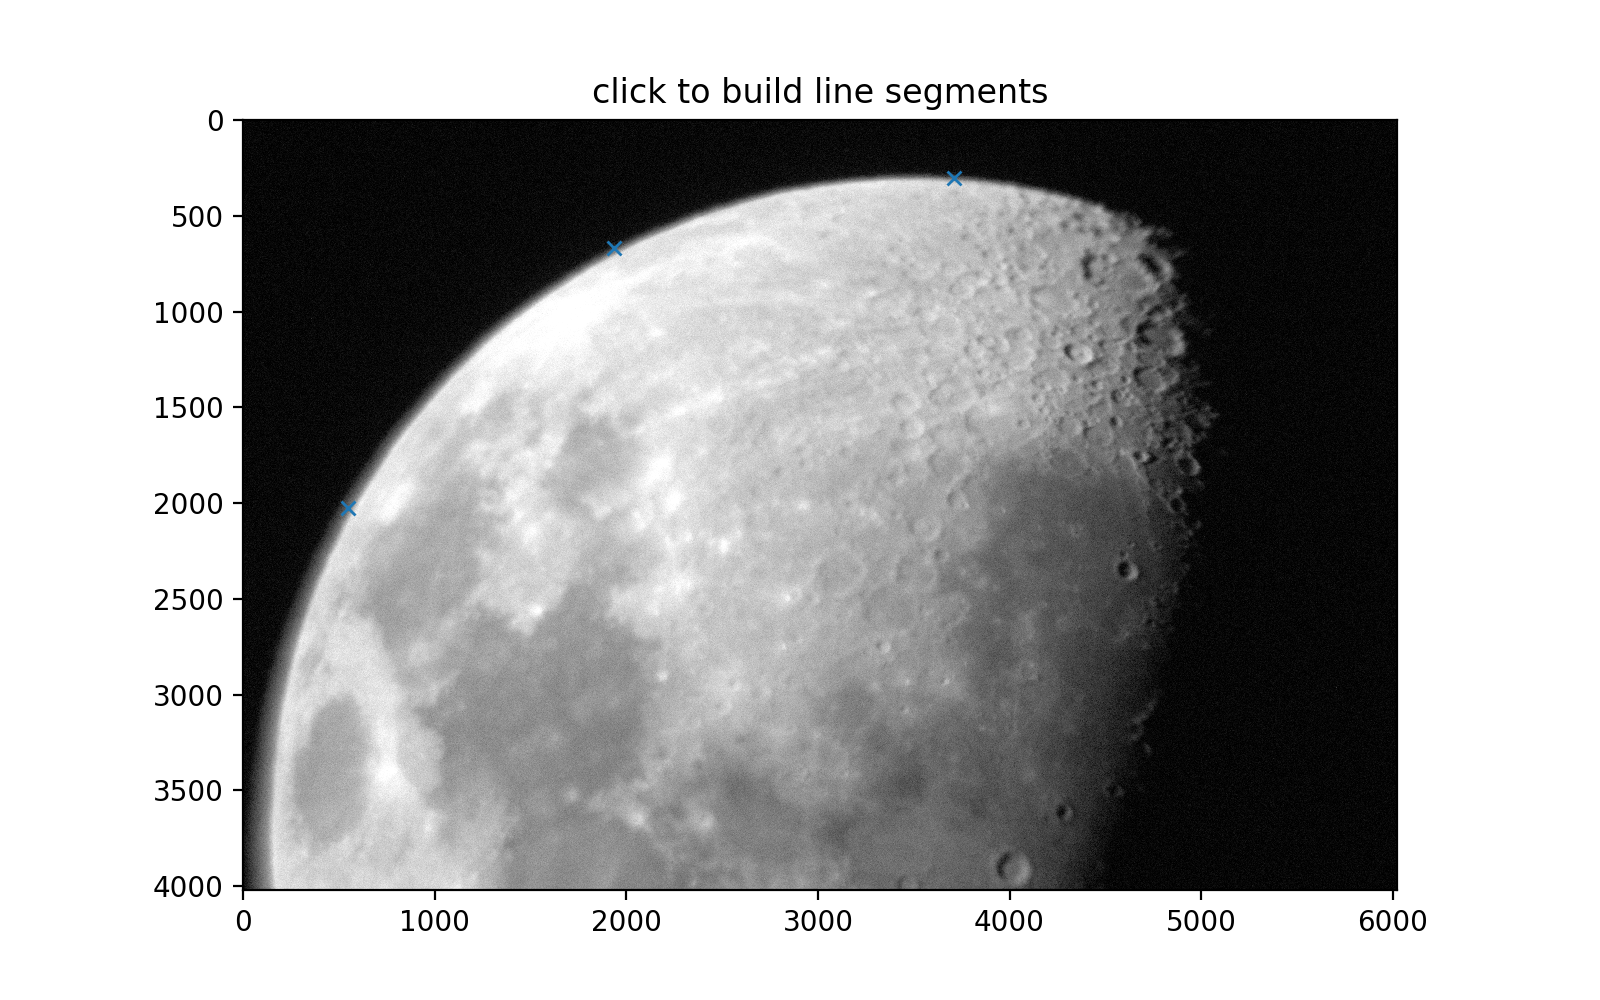

Chasch aafange zeichne


In [5]:
n=3
#fig = plt.figure()#default
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([], [], marker='x', markersize=5, linestyle='')  # empty line
linebuilder = LineBuilder(line, n)
raw = rawpy.imread('krater.CR2')
rgb = raw.postprocess(use_camera_wb=True)
intensity = np.sum(rgb, axis=2)/3.0
picture = rgb
for i in range(3):
    picture[:,:,i] = intensity
imshow(picture)
#PIL.Image.fromarray(rgb).save('image.jpg', quality=90, optimize=True)
raw.close()
#print(np.mean(intensity))
print('Chasch aafange zeichne')
plt.show()

In [6]:
xwerte=linebuilder.xs
ywerte=linebuilder.ys
radisu, mitt=radius_finder(xwerte,ywerte)
print(radisu, mitt)

3332.97763141 [ 3467.46428676  3624.29279265]
